### Arquivo para teste e avaliação de clusters

In [1]:
#imports
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('./clusters')

from clusters.clusters import *
from clusters.utils_clusters import *

In [2]:
# executa os metodos de clusterização que recebem apenas k como parametro : run_kmeans, run_fasterpam, run_fastermsc, run_dynmsc, run_agnes
def run_methods_with_k(embeddings, methods, k_values, output_path, dataset_name):
    os.makedirs(output_path, exist_ok=True)
    
    for method in methods:
        print(f"Executando {method.__name__}")
        results = []
        for k in k_values:
            print(f" - k = {k}")
            try:
                cluster_ids, model = method(embeddings, k)

                method_path = os.path.join(output_path, method.__name__)
                os.makedirs(method_path, exist_ok=True)

                save_path = os.path.join(method_path, f"{dataset_name}_cluster_{method.__name__}_k{k}.csv")
                save_clusters(cluster_ids, save_path)

                silhouette = evaluate_silhouette(embeddings, cluster_ids)
                dunn = evaluate_dunn(embeddings, cluster_ids)

                results.append({
                    "Method": method.__name__,
                    "k": k,
                    "Silhouette": silhouette,
                    "Dunn": dunn
                })
            except Exception as e:
                print(f"Erro ao executar {method.__name__} com k = {k}: {e}")
        
        results_df = pd.DataFrame(results)
        results_csv_path = os.path.join(output_path, f"{dataset_name}_{method.__name__}_results.csv")
        results_df.to_csv(results_csv_path, index=False)    
    print("Clusterização concluída e resultados salvos")       

In [3]:
def run_spectral_grid(embeddings, k_values, n_values):
    print("Spectral")

In [4]:
def run_dbscan_grid(embbeddings, eps_values, min_samples_values):
    print("DBSCAN")

In [5]:
def run_hdbscan_variantes(embeddings, min_cluster_sizes):
    print("HDBSCAN")

In [6]:
# parametros de teste
dataset = 'Beauty'
embedding_path = f'../data_preprocessing/{dataset}/{dataset}-similarity-values-thenlper_gte-large.pt'
output_path = f'clusters/{dataset}'
os.makedirs(output_path, exist_ok=True)
embeddings = load_embeddings(embedding_path) #carregando embeddings

In [7]:
#teste dos clusters com algoritmos que usam k

methods = [run_kmeans, run_agnes, run_fasterpam, run_fastermsc, run_dynmsc]
k_values = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]


run_methods_with_k(embeddings=embeddings, methods = methods, k_values = k_values, output_path = output_path, dataset_name=dataset)

Executando run_kmeans
 - k = 2
Clusters salvos em clusters/Beauty\run_kmeans\Beauty_cluster_run_kmeans_k2.csv
 - k = 4
Clusters salvos em clusters/Beauty\run_kmeans\Beauty_cluster_run_kmeans_k4.csv
 - k = 6
Clusters salvos em clusters/Beauty\run_kmeans\Beauty_cluster_run_kmeans_k6.csv
 - k = 8
Clusters salvos em clusters/Beauty\run_kmeans\Beauty_cluster_run_kmeans_k8.csv
 - k = 10
Clusters salvos em clusters/Beauty\run_kmeans\Beauty_cluster_run_kmeans_k10.csv
 - k = 12
Clusters salvos em clusters/Beauty\run_kmeans\Beauty_cluster_run_kmeans_k12.csv
 - k = 14
Clusters salvos em clusters/Beauty\run_kmeans\Beauty_cluster_run_kmeans_k14.csv
 - k = 16
Clusters salvos em clusters/Beauty\run_kmeans\Beauty_cluster_run_kmeans_k16.csv
 - k = 18
Clusters salvos em clusters/Beauty\run_kmeans\Beauty_cluster_run_kmeans_k18.csv
 - k = 20
Clusters salvos em clusters/Beauty\run_kmeans\Beauty_cluster_run_kmeans_k20.csv
 - k = 22
Clusters salvos em clusters/Beauty\run_kmeans\Beauty_cluster_run_kmeans_k22.

In [ ]:
def test_method(name, func, embeddings, k):
    try:
        print(f"\nTestando {name} com k={k}...")
        cluster_ids, model = func(embeddings, n_clusters=k)
        num_clusters = len(set(cluster_ids))
        print(f"{name} executado com sucesso.")
        print(f"Número de clusters encontrados: {num_clusters}")
        assert len(cluster_ids) == embeddings.shape[0], "Tamanho do cluster_ids não bate com embeddings!"
    except Exception as e:
        print(f"Erro no {name}: {e}")

k=10
test_method("FASTERMSC", run_fastermsc, embeddings, k)
test_method("DYNMSC", run_dynmsc, embeddings, k)
test_method("FASTERPAM", run_fasterpam, embeddings, k)
test_method("KMeans", run_kmeans, embeddings, k)
test_method("AGNES", run_agnes, embeddings, k)




Testando FASTERMSC com k=10...


In [ ]:
k=7
n = 15
print(f"\nTestando SPECTRAL com k={k}...")
cluster_ids, model = run_spectral(embeddings, n_clusters=k, n_neighbors=n)
num_clusters = len(set(cluster_ids))
print("SPECTRAL executado com sucesso.")
print(f"Número de clusters encontrados: {num_clusters}")



Testando SPECTRAL com k=7...


C:\Users\cruzd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


SPECTRAL executado com sucesso.
Número de clusters encontrados: 7


In [7]:
print("\nTestando DBSCAN ...")
cluster_ids, model = run_dbscan(embeddings, eps=0.4, min_samples=10)
num_clusters = len(set(cluster_ids))
print("DBSCAN executado com sucesso.")
print(f"Número de clusters encontrados: {num_clusters}")


Testando DBSCAN ...
DBSCAN executado com sucesso.
Número de clusters encontrados: 1


In [ ]:
print("\nTestando HDBSCAN ...")
cluster_ids, model = run_hdbscan(embeddings, min_cluster_size=10)
num_clusters = len(set(cluster_ids))
print("HDBSCAN executado com sucesso.")
print(f"Número de clusters encontrados: {num_clusters}")


Testando HDBSCAN ...


C:\Users\cruzd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\cruzd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


HDBSCAN executado com sucesso.
Número de clusters encontrados: 6


In [20]:
# kmeans para diferentes k
scores = []
k_values = [2, 3, 4, 5, 6, 7, 8, 9]
inertias= []
for k in k_values:
    # run KMeans
    cluster_ids, kmeans_model = run_kmeans(embeddings, n_clusters=k)

    # slvar clusters
    output_path = f'clusters/Beauty/kmeansk{k}_clusters.csv'
    save_clusters(cluster_ids, output_path)

    # #inércia do modelo kmeans
    # inertias.append({'k': k, 'inertia': kmeans_model.inertia_})
    # print(f'Inertia (k = {k}): {kmeans_model.inertia_:.4f}')
    
    # # Silhouette
    # score = evaluate_silhouette(embeddings, cluster_ids)
    # scores.append({'k': k, 'silhouette_score': score})
    # print(f'Silhouette score (k = {k}): {score:.4f}')

# # Salvar os resultados ddo coeficiente de silhueta em um arquivo CSV
# df_scores = pd.DataFrame(scores)
# df_scores.to_csv('clusters/Beauty/kmeans_silhouette_scores.csv', index=False)

# # Salvar os resultados da inercia em um arquivo CSV
# df_inertias = pd.DataFrame(inertias)
# df_inertias.to_csv('clusters/Beauty/kmeans_inertia_scores.csv', index=False)

Clusters salvos em clusters/Beauty/kmeansk2_clusters.csv
Clusters salvos em clusters/Beauty/kmeansk3_clusters.csv
Clusters salvos em clusters/Beauty/kmeansk4_clusters.csv
Clusters salvos em clusters/Beauty/kmeansk5_clusters.csv
Clusters salvos em clusters/Beauty/kmeansk6_clusters.csv
Clusters salvos em clusters/Beauty/kmeansk7_clusters.csv
Clusters salvos em clusters/Beauty/kmeansk8_clusters.csv
Clusters salvos em clusters/Beauty/kmeansk9_clusters.csv


In [21]:
#plotando grafico silhouette score X k

df_scores = pd.read_csv('clusters/Beauty/kmeans_silhouette_scores.csv')

plt.figure(figsize=(10, 5))
plt.plot(df_scores['k'], df_scores['silhouette_score'], marker='o', linestyle='--', color='blue')
plt.title('Silhouette Score vs Número de Clusters (k)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'clusters/Beauty/kmeans_silhouette_scores.csv'

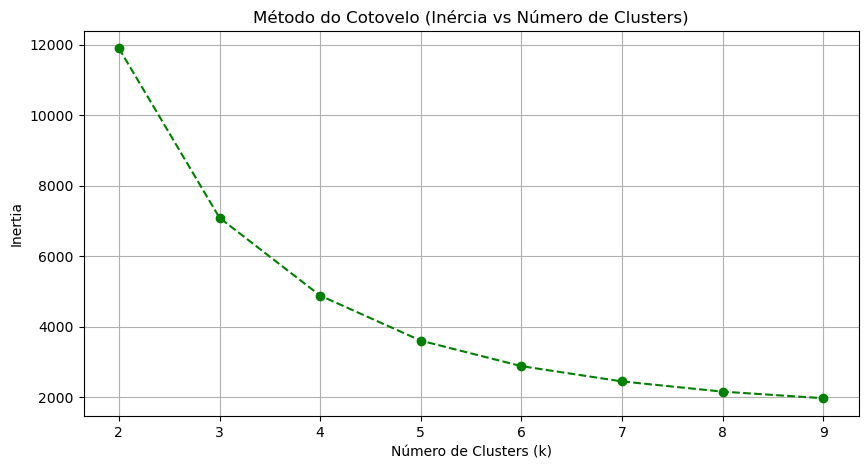

In [ ]:
# método de cotovelo (grafico inertia X k)
df_scores = pd.read_csv('clusters/Beauty/kmeans_inertia_scores.csv')

plt.figure(figsize=(10, 5))
plt.plot(df_inertias['k'], df_inertias['inertia'], marker='o', linestyle='--', color='green')
plt.title('Método do Cotovelo (Inércia vs Número de Clusters)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()